In [ ]:
# Import libraries
import numpy as np
import pandas as pd

# New Section

In [ ]:
# Read data from dataset into dataframe 
df = pd.read_csv('survey lung cancer.csv')

In [3]:
# Display first 5 rows
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Data Reduction
# Remove/reduce unnecessary attributes from dataframe
subset = df[['SMOKING','ANXIETY', 'CHRONIC DISEASE',  'ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']]
subset.head()

,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,2,1,2,2,2,2,2,YES
1,2,1,2,1,1,2,2,2,YES
2,1,1,1,1,2,2,1,2,NO
3,2,2,1,2,1,1,2,2,NO
4,1,1,1,1,2,2,1,1,NO


In [5]:
# Data Cleaning
# Find missing values
subset.isnull().sum()

SMOKING                  0
ANXIETY                  0
CHRONIC DISEASE          0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
# Define function for median
def impute_median(series):
    return series.fillna(series.median())

In [20]:
subset.Price=df['SMOKING'].transform(impute_median)
subset.Category=df['SHORTNESS OF BREATH'].transform(impute_median)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [7]:
# Data Reduction 
subset1 = df[['SMOKING', 'COUGHING', 'SHORTNESS OF BREATH','CHEST PAIN','LUNG_CANCER']]
subset1.head()

,SMOKING,COUGHING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,1,2,2,2,YES
1,2,1,2,2,YES
2,1,2,2,2,NO
3,2,1,1,2,NO
4,1,2,2,1,NO


In [8]:
display(subset,subset1)

,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,2,1,2,2,2,2,2,YES
1,2,1,2,1,1,2,2,2,YES
2,1,1,1,1,2,2,1,2,NO
3,2,2,1,2,1,1,2,2,NO
4,1,1,1,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...
304,1,1,2,2,2,2,2,1,YES
305,2,1,1,2,2,2,1,2,YES
306,2,1,1,2,2,1,1,2,YES
307,2,2,1,2,2,2,1,2,YES


,SMOKING,COUGHING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,1,2,2,2,YES
1,2,1,2,2,YES
2,1,2,2,2,NO
3,2,1,1,2,NO
4,1,2,2,1,NO
...,...,...,...,...,...
304,1,2,2,1,YES
305,2,2,2,2,YES
306,2,2,1,2,YES
307,2,2,2,2,YES


In [9]:
# Data Integration
# Integrate/merge two dataframe
subset2 = pd.merge(subset,subset1,left_index=True, right_index=True)

In [10]:
subset2.head(20)

,SMOKING_x,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,COUGHING_x,SHORTNESS OF BREATH_x,SWALLOWING DIFFICULTY,CHEST PAIN_x,LUNG_CANCER_x,SMOKING_y,COUGHING_y,SHORTNESS OF BREATH_y,CHEST PAIN_y,LUNG_CANCER_y
0,1,2,1,2,2,2,2,2,YES,1,2,2,2,YES
1,2,1,2,1,1,2,2,2,YES,2,1,2,2,YES
2,1,1,1,1,2,2,1,2,NO,1,2,2,2,NO
3,2,2,1,2,1,1,2,2,NO,2,1,1,2,NO
4,1,1,1,1,2,2,1,1,NO,1,2,2,1,NO
5,1,1,2,1,2,2,1,1,YES,1,2,2,1,YES
6,2,1,1,2,2,2,1,2,YES,2,2,2,2,YES
7,2,2,1,1,1,2,2,1,YES,2,1,2,1,YES
8,2,2,1,1,1,1,1,1,NO,2,1,1,1,NO
9,2,2,2,2,1,1,2,2,YES,2,1,1,2,YES


In [11]:
# Data Transformation
from openpyxl import Workbook
subset2.to_excel('combine.xlsx')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd4136e6d0>,
      dtype=object)

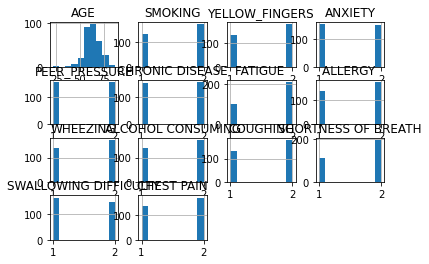

In [12]:
df.hist()

In [13]:
# Import train_test_split function
import sklearn.model_selection
from sklearn.model_selection import train_test_split

#Separate columns in dependent and independent variables

X = subset.drop("LUNG_CANCER", axis= 1)
Y = subset[["LUNG_CANCER"]]

In [14]:
# Split dataset into tranining and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=1)

In [15]:
# Import Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using traning sets
model.fit(X_train, Y_train)

# Predict the response for test datasets
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from sklearn import metrics

In [17]:
print("accuracy:", metrics.accuracy_score (Y_test, Y_pred))

accuracy: 0.8602150537634409


In [18]:
test_pred = model.predict(X_test)

print(metrics.classification_report(Y_test, test_pred))
print(metrics.confusion_matrix(Y_test, test_pred))

              precision    recall  f1-score   support

          NO       0.33      0.44      0.38         9
         YES       0.94      0.90      0.92        84

    accuracy                           0.86        93
   macro avg       0.64      0.67      0.65        93
weighted avg       0.88      0.86      0.87        93

[[ 4  5]
 [ 8 76]]
